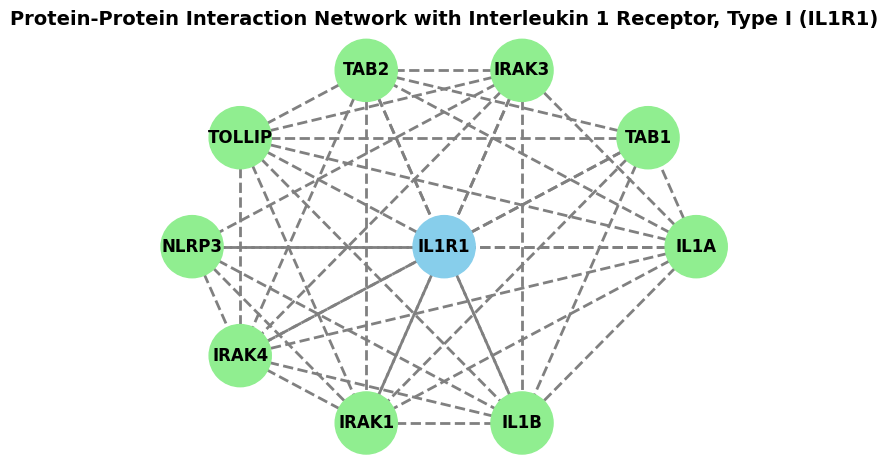

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import math

# Define the list of target proteins
target_proteins = {'IL1A', 'IL1B', 'IRAK1', 'IRAK3', 'IRAK4', 'NLRP3', 'TOLLIP', 'IL1R1', 'TAB1', 'TAB2'}

# Path to the downloaded TSV file and the output file
input_file = 'string_interactions_short.tsv'
output_file = 'filtered_interactions.tsv'

# Read the TSV file and filter interactions
filtered_interactions = []
with open(input_file, 'r', newline='') as f_in:
    reader = csv.reader(f_in, delimiter='\t')
    header = next(reader)  # Read the header
    filtered_interactions.append(header)  # Write the header to the filtered interactions
    for row in reader:
        protein1 = row[0]
        protein2 = row[1]
        combined_score = float(row[10])  # The combined score represents the confidence of the interaction
        # Check if the interaction involves any target protein
        if protein1 in target_proteins and protein2 in target_proteins:
            filtered_interactions.append(row)

# Create a graph
G = nx.Graph()
for row in filtered_interactions[1:]:  # Skip header
    protein1 = row[0]
    protein2 = row[1]
    combined_score = float(row[10])  # The combined score represents the confidence of the interaction
    G.add_edge(protein1, protein2, weight=combined_score)

# Set positions for circular layout
num_nodes = len(G.nodes)
radius = 2  # Radius of the circle
theta = 2 * math.pi / num_nodes
pos = {node: (radius * math.cos(i * theta), radius * math.sin(i * theta)) for i, node in enumerate(G.nodes)}

# Ensure IL1R1 is in the middle
pos['IL1R1'] = (0, 0)

# Draw the nodes with enhanced colors
node_colors = ['skyblue' if node == 'IL1R1' else 'lightgreen' for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors)

# Draw the edges with enhanced style
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', style='dashed')

# Draw the labels separately to avoid interference with edges
node_labels = {node: node for node in G.nodes if node != 'IL1R1'}  # Exclude IL1R1 label
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight="bold", font_color="black")

# Draw the IL1R1 label in the center
nx.draw_networkx_labels(G, {'IL1R1': (0, 0)}, labels={'IL1R1': 'IL1R1'}, font_size=12, font_weight="bold", font_color="black")

plt.title("Protein-Protein Interaction Network with Interleukin 1 Receptor, Type I (IL1R1)", fontsize=14, fontweight='bold')
plt.axis('off')  # Turn off axis
plt.tight_layout()  # Adjust layout for better presentation
plt.savefig("protein_network_beautiful.png", dpi=600, bbox_inches='tight')  # Save image with 600 dpi
plt.show()
